## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#importing required python pacakges and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading data and storing as dataframe 
GTD_data = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project 1/Global Terrorism Data.csv",encoding = "ISO-8859-1")
GTD_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# Understanding data structure 

GTD_data.shape


(181691, 135)

In [ ]:
GTD_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
GTD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# Checking columns with a very high count of null values as compared to the total records(ratio : Null values count/ total count < 0.5 (approx.)).
pd.set_option('display.max_rows',None)
cols = GTD_data.isna().sum()
cols_df = cols.to_frame()
cols_df.rename(columns={0:"Null values count"},inplace=True)
cols_high_nullvalues_count = cols_df[cols_df["Null values count"] > 100000]
cols_high_nullvalues_count


,Null values count
approxdate,172452
resolution,179471
location,126196
alternative,152680
alternative_txt,152680
attacktype2,175377
attacktype2_txt,175377
attacktype3,181263
attacktype3_txt,181263
targtype2,170547


In [ ]:
# 77 rows have large number of null values (more than 100000)
cols_high_nullvalues_count.shape

(77, 1)

In [ ]:
GTDdata_copy = GTD_data.copy()
GTD_data.drop_duplicates(keep = False, inplace = True)                     

In [ ]:
#copying the original data into GTDdata to keep an original copy of the data

cols_high_nullvalues_count['variables'] = cols_high_nullvalues_count.index
cols_high_nullvalues_count.reset_index(inplace=True,drop=True)
cols_high_nullvalues_count



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Null values count,variables
0,172452,approxdate
1,179471,resolution
2,126196,location
3,152680,alternative
4,152680,alternative_txt
5,175377,attacktype2
6,175377,attacktype2_txt
7,181263,attacktype3
8,181263,attacktype3_txt
9,170547,targtype2


In [ ]:
# Dropping columns having a large number of missing values
GTD_data.drop(columns = list(cols_high_nullvalues_count['variables']),inplace=True)


In [ ]:
# Dropping the columns which are not required
cols = ['eventid','country','region','iday','specificity','vicinity','summary','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','weapsubtype1','weapdetail','scite1','dbsource','latitude','longitude']
GTD_data.drop(columns = cols,axis = 1,inplace = True)


In [ ]:
# Number of columns left after dropping columns in previous steps
GTD_data.shape


(181691, 40)

In [ ]:
# Function for Checking remaining null values
def finding_null_values(GTD_data):
  rem_nulls = GTD_data.isna().sum().to_frame()
  rem_nulls.rename(columns={0:"Null values count"},inplace=True)
  rem_nulls['variables'] = rem_nulls.index
  rem_nulls.reset_index(inplace=True,drop=True)
  return rem_nulls[rem_nulls['Null values count'] != 0]
  


In [ ]:
finding_null_values(GTD_data)

,Null values count,variables
5,421,provstate
6,434,city
10,1,doubtterr
11,1,multiple
16,10373,targsubtype1_txt
17,42550,corp1
18,636,target1
19,1559,natlty1_txt
21,380,guncertain1
23,71115,nperps


In [ ]:
# removing and replacing null values
GTD_data.dropna(subset=['provstate','city','doubtterr','multiple','target1','guncertain1','ishostkid'],inplace=True)
finding_null_values(GTD_data)

,Null values count,variables
16,10056,targsubtype1_txt
17,41936,corp1
19,1489,natlty1_txt
23,70275,nperps
24,68599,nperpcap
25,65279,claimed
27,20533,weapsubtype1_txt
28,10231,nkill
29,63621,nkillus
30,66118,nkillter


In [ ]:
# On checking the invalid values for nperps and npercap variable we found out that -99 is the value assigned for unknowns so we will be replacing the null values with -99
# in further steps 

t = GTD_data[(GTD_data['nperps']<0) & (GTD_data['nperpcap']<0)]   
t[['nperps','nperpcap']].head(20)



,nperps,nperpcap
5,-99.0,-99.0
7,-99.0,-99.0
11,-99.0,-99.0
13,-99.0,-99.0
14,-99.0,-99.0
17,-99.0,-99.0
18,-99.0,-99.0
19,-99.0,-99.0
20,-99.0,-99.0
24,-99.0,-99.0


In [ ]:
t = GTD_data[(GTD_data['doubtterr']<0)]   
t['doubtterr'].head(20)

4     -9.0
12    -9.0
34    -9.0
67    -9.0
68    -9.0
95    -9.0
115   -9.0
241   -9.0
288   -9.0
290   -9.0
349   -9.0
350   -9.0
355   -9.0
356   -9.0
360   -9.0
379   -9.0
399   -9.0
403   -9.0
405   -9.0
408   -9.0
Name: doubtterr, dtype: float64

In [ ]:
finding_null_values(GTD_data)

,Null values count,variables
16,10056,targsubtype1_txt
17,41936,corp1
19,1489,natlty1_txt
23,70275,nperps
24,68599,nperpcap
25,65279,claimed
27,20533,weapsubtype1_txt
28,10231,nkill
29,63621,nkillus
30,66118,nkillter


In [ ]:
GTD_data['targsubtype1_txt'].fillna("Unknown",inplace=True)
GTD_data['corp1'].fillna("Unknown",inplace=True)
GTD_data['natlty1_txt'].fillna("Unknown",inplace=True)
GTD_data['nperps'].fillna(-99,inplace=True) # As seen in previous steps, the unknown values for this column are assigned as -99, so replacing null values with -99
GTD_data['nperpcap'].fillna(-99,inplace=True) # As seen in previous steps, the unknown values for this column are assigned as -99, so replacing null values with -99
GTD_data['claimed'].fillna(0,inplace=True) # We are assuming null values to be equal to 0 which indicates nobody took responsibility of the incident
GTD_data['weapsubtype1_txt'].fillna("Unknown",inplace=True)
GTD_data['nkill'].fillna(-1,inplace=True) # Putting negative value in place of not null so that nkill doesnot gets counted in either side 
GTD_data['nkillus'].fillna(-1,inplace=True)
GTD_data['nkillter'].fillna(-1,inplace=True)
GTD_data['nwound'].fillna(-1,inplace=True)
GTD_data['nwoundus'].fillna(-1,inplace=True)
GTD_data['nwoundte'].fillna(-1,inplace=True)


In [ ]:
#No null values remaining
finding_null_values(GTD_data)

,Null values count,variables


In [ ]:
# Renaming columns with more explainable name

GTD_data.rename(columns={"iyear":"Year of Attack","imonth":"Month of Attack","extended":"Extended Incident","country_txt":"Country","region_txt":"Region","provstate":"Subnational Admin Region",
                         "doubtterr":"unsure terrorism Incident","multiple":"Multiple Incident","success":"Successful Attack","suicide":"Suicide Attack","attacktype1_txt":"Attack Type",
                         "targtype1_txt":"Target type", "targsubtype1_txt":"Target subtype","corp1":"Targeted Entity","target1":"Specific target/victim","natlty1_txt":"Target/Victim Nationality",
                         "gname":"Perpetrator Group","guncertain1":"unconfirmed perpetrator group","individual":"Individual perpetrator","nperps":"Number of perpetrators","nperpcap":"captured perpetrators",
                         "claimed":"Responsibility claimed","weaptype1_txt":"Weapon Type","weapsubtype1_txt":"Weapon Sub Type","nkill":"Fatalities count","nkillus":"Fatalities Count (US)",
                         "nkillter":"Number of Perpetrator Fatalities","nwound":"Injured victims","nwoundus":"Injured victims(US)","nwoundte":"Injured Perpetrators",
                         "property":"Property Damaged","ishostkid":"Hostages/kidnapped Victims","INT_LOG":"International Logistical Attack","INT_IDEO":"International Ideological Attack",
                         "INT_MISC":"International Miscellaneous Attack","INT_ANY":"International Attack","crit1":"Political/Social/Religious/social Goal",
                         "crit2":"Coerced/Intimidating/Publicize to larger audience Goal","crit3":"Outside Iternational Humantarian Law"},inplace=True)

In [ ]:
GTD_data.head(5)
GTD_data.shape

(179670, 40)

***Exploring the data***

In [ ]:
# Function created to do Grouping of data based on column name provided

def grouped_data(col,df):
  GTD_data1 = df[df['unsure terrorism Incident'] == 0]
  count_of_attacks = GTD_data1.groupby(col)[col].count()
  return count_of_attacks
  

  




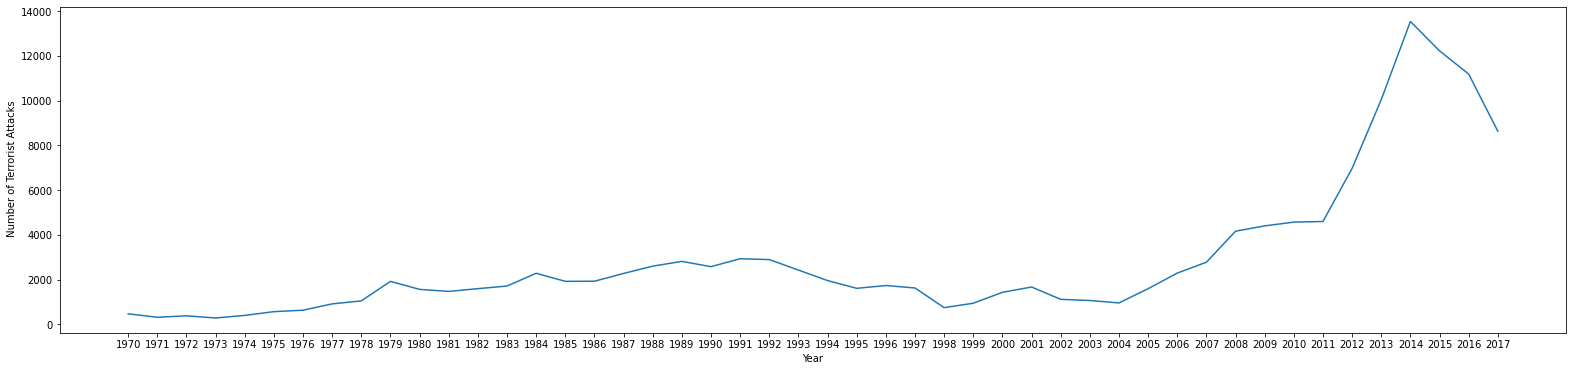

In [ ]:
# Year wise fluctations of confirmed(sure) Terrorist attacks 
output_data = grouped_data('Year of Attack',GTD_data)
plt.figure(figsize=(27,6))
plt.plot(output_data)
plt.xticks(np.arange(1970,2018,1))
plt.xlabel("Year")
plt.ylabel(" Number of Terrorist Attacks")
plt.show()


**Observation:  2014 was the year with highest number of confirmed/sure terrorist attacks. we have considered data subset in which it is confirmed that those are terrorism attacks for sure.There was a sudden rise in terrorist attacks after 2011, it kept on increasing after 2011 and after 2014 again started declining.**







---



In [ ]:
GTD_data.head(2)

,Year of Attack,Month of Attack,Extended Incident,Country,Region,Subnational Admin Region,city,Political/Social/Religious/social Goal,Coerced/Intimidating/Publicize to larger audience Goal,Outside Iternational Humantarian Law,unsure terrorism Incident,Multiple Incident,Successful Attack,Suicide Attack,Attack Type,Target type,Target subtype,Targeted Entity,Specific target/victim,Target/Victim Nationality,Perpetrator Group,unconfirmed perpetrator group,Individual perpetrator,Number of perpetrators,captured perpetrators,Responsibility claimed,Weapon Type,Weapon Sub Type,Fatalities count,Fatalities Count (US),Number of Perpetrator Fatalities,Injured victims,Injured victims(US),Injured Perpetrators,Property Damaged,Hostages/kidnapped Victims,International Logistical Attack,International Ideological Attack,International Miscellaneous Attack,International Attack
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,0,7.0,-99.0,0.0,Unknown,Unknown,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0,1.0,0,1,1,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Unknown,Unknown,1.0,-1.0,-1.0,0.0,-1.0,-1.0,0,0.0,-9,-9,1,1


In [ ]:
output_data = grouped_data('Region',GTD_data).to_frame()
output_data

,Region
Region,
Australasia & Oceania,155
Central America & Caribbean,5235
Central Asia,375
East Asia,484
Eastern Europe,3394
Middle East & North Africa,39014
North America,2467
South America,14464
South Asia,36735


Text(0.5, 0, 'Number of confirmed terrorist attacks')

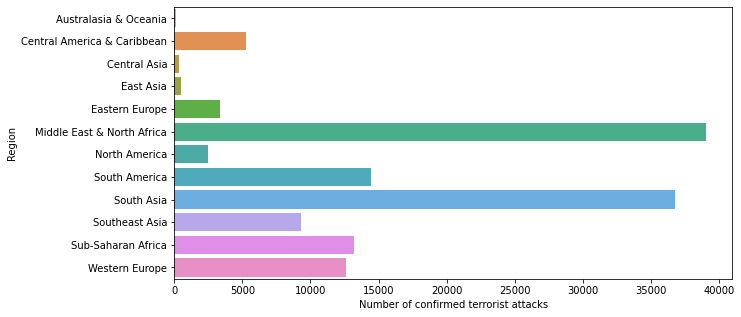

In [ ]:
#Calling function grouped_data to group  data using region and count sure terrorist attacks

output_data = grouped_data('Region',GTD_data).to_frame()

# Plotting the count of comfirmed terrorist attacks for each region
l1 =[]
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(0,12):
  l1.append(output_data['Region'][i])
sns.barplot(x=l1,y=output_data.index,ax=ax)
plt.xlabel("Number of confirmed terrorist attacks")


**Observation:Middle East and North Africa region has the highest number of confirmed terrorist attacks.Central Asia has lowest number of confirmed terrorist attacks**

In [ ]:
GTD_data.head(3)

,Year of Attack,Month of Attack,Extended Incident,Country,Region,Subnational Admin Region,city,Political/Social/Religious/social Goal,Coerced/Intimidating/Publicize to larger audience Goal,Outside Iternational Humantarian Law,unsure terrorism Incident,Multiple Incident,Successful Attack,Suicide Attack,Attack Type,Target type,Target subtype,Targeted Entity,Specific target/victim,Target/Victim Nationality,Perpetrator Group,unconfirmed perpetrator group,Individual perpetrator,Number of perpetrators,captured perpetrators,Responsibility claimed,Weapon Type,Weapon Sub Type,Fatalities count,Fatalities Count (US),Number of Perpetrator Fatalities,Injured victims,Injured victims(US),Injured Perpetrators,Property Damaged,Hostages/kidnapped Victims,International Logistical Attack,International Ideological Attack,International Miscellaneous Attack,International Attack
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,0,7.0,-99.0,0.0,Unknown,Unknown,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0,1.0,0,1,1,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Unknown,Unknown,1.0,-1.0,-1.0,0.0,-1.0,-1.0,0,0.0,-9,-9,1,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,U.S. Embassy,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Explosives,Unknown Explosive Type,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0.0,-9,-9,1,1


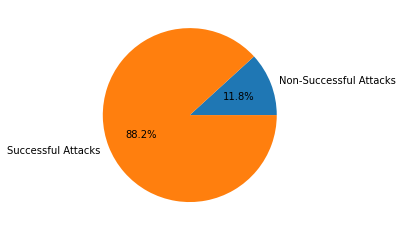

In [ ]:
#Checking that how many terrorrist attacks were successful
%matplotlib inline
output_data = grouped_data('Successful Attack',GTD_data).to_frame()

my_labels = ["Non-Successful Attacks ","Successful Attacks"] 
plt.pie(output_data['Successful Attack'],labels=my_labels,autopct='%.1f%%')
plt.show()

**Observation:** There were approx. 88.2 % successful attacks and 11.8 % unsuccessful attacks

In [ ]:
GTD_data.head(3)

,Year of Attack,Month of Attack,Extended Incident,Country,Region,Subnational Admin Region,city,Political/Social/Religious/social Goal,Coerced/Intimidating/Publicize to larger audience Goal,Outside Iternational Humantarian Law,unsure terrorism Incident,Multiple Incident,Successful Attack,Suicide Attack,Attack Type,Target type,Target subtype,Targeted Entity,Specific target/victim,Target/Victim Nationality,Perpetrator Group,unconfirmed perpetrator group,Individual perpetrator,Number of perpetrators,captured perpetrators,Responsibility claimed,Weapon Type,Weapon Sub Type,Fatalities count,Fatalities Count (US),Number of Perpetrator Fatalities,Injured victims,Injured victims(US),Injured Perpetrators,Property Damaged,Hostages/kidnapped Victims,International Logistical Attack,International Ideological Attack,International Miscellaneous Attack,International Attack
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,0,7.0,-99.0,0.0,Unknown,Unknown,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0,1.0,0,1,1,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Unknown,Unknown,1.0,-1.0,-1.0,0.0,-1.0,-1.0,0,0.0,-9,-9,1,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,U.S. Embassy,United States,Unknown,0.0,0,-99.0,-99.0,0.0,Explosives,Unknown Explosive Type,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0.0,-9,-9,1,1


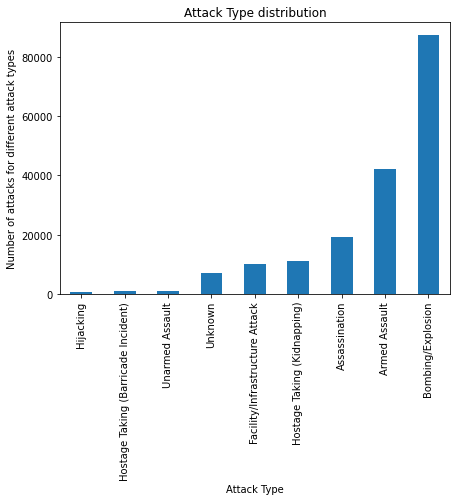

In [ ]:

output_data = GTD_data.groupby(['Attack Type'])['Attack Type'].count()
output_data.sort_values().plot.bar(ylabel="Number of attacks for different attack types",figsize=(7,5),title="Attack Type distribution")




**Observation:** Overall attacks were maximum for Bombing/explosion attack type

In [ ]:
# function to check the attack types for different years pass year as variable
def attacks_graph(num):

  output_data = GTD_data.groupby(['Year of Attack','Attack Type'])['Attack Type'].count().to_frame()
  output_data.index = output_data.index.set_names(['Year_of_Attack', 'Attack_Type'])
  output_data.reset_index(inplace=True)
  output_data = output_data[(output_data['Year_of_Attack']) == num]
  output_data.rename(columns = {'Attack Type':'Number of attacks'},inplace= True)
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x=output_data['Year_of_Attack'],y=output_data['Number of attacks'],hue=output_data['Attack_Type'],ax=ax).set(title="Attack type for year:"+str(num))

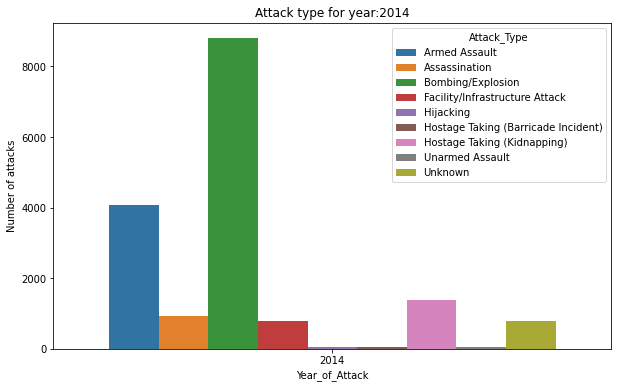

In [ ]:
# Calling function to analyse attack types for any particular year. Checking for 2014 year. In same way, we can pass any year to check
attacks_graph(2014)

For year 2014 : Maximum attacks are of Bombing/explosion type followed by armed assault attack type

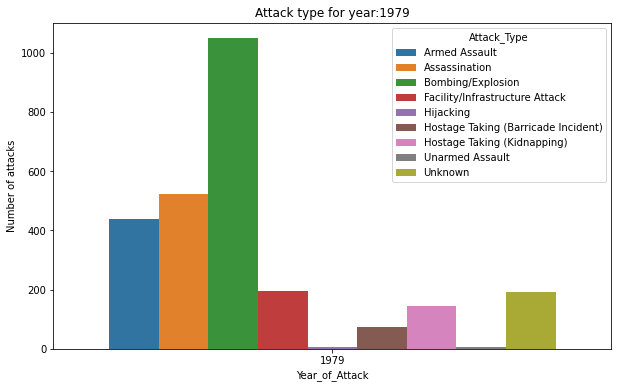

In [ ]:
attacks_graph(1979)

For year 1979 : Maximum attacks are of Bombing/explosion type followed by assassination attack type

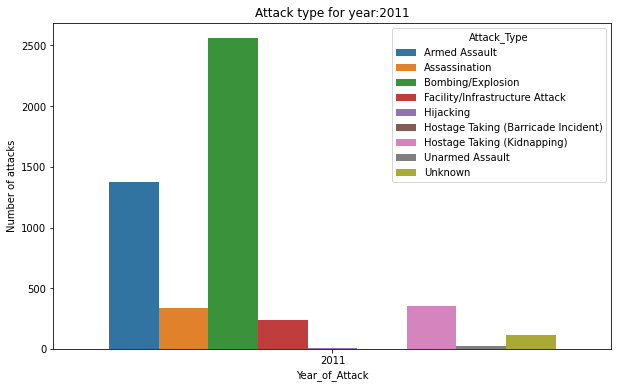

In [ ]:
attacks_graph(2011)


For year 2011 : Maximum attacks are of Bombing/explosion type followed by armed assault attack type

